<a href="https://colab.research.google.com/github/AnannyaSagar/Exploratory-Data-Analysis-of-Hotel-Booking-Dataset/blob/main/EDA_of_Hotel_Booking_Analysis_(Individual_Notebook)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter Notes/Hotel Bookings.csv')


In [4]:
#Checking the length of the dataset
df.shape

(119390, 32)

In [5]:
#Looking at the first 5 rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#Looking at the last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
#Looking at random 5 rows
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
31338,Resort Hotel,0,1,2016,December,52,20,0,4,2,...,No Deposit,241.0,NaN,0,Transient,31.6,0,1,Check-Out,2016-12-24
114866,City Hotel,0,348,2017,June,26,25,2,1,2,...,No Deposit,9.0,NaN,0,Transient,123.3,0,2,Check-Out,2017-06-28
79908,City Hotel,0,0,2015,November,45,2,1,4,2,...,No Deposit,9.0,NaN,0,Contract,107.0,0,1,Check-Out,2015-11-07
106716,City Hotel,0,20,2017,February,9,26,2,2,2,...,No Deposit,14.0,NaN,0,Transient,79.2,0,1,Check-Out,2017-03-02
50175,City Hotel,1,34,2016,April,18,24,2,4,1,...,No Deposit,9.0,NaN,0,Transient,181.2,0,0,Canceled,2016-04-13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [10]:
#Checking for null values
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

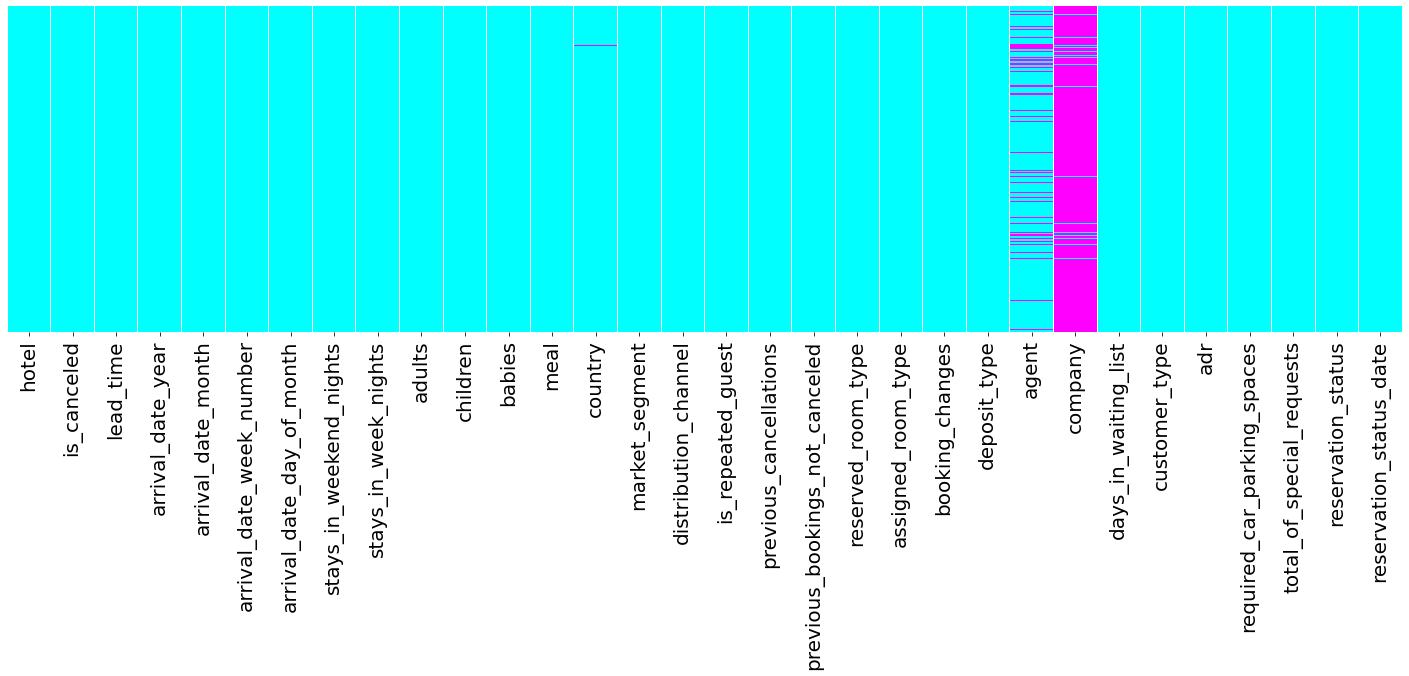

In [11]:
#Null values heatmap
plt.figure(figsize=(25,6))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='cool')
plt.xticks(color = 'black', rotation = 90,size= 20);

There are many null values in Country column followed by Agent,Country, and Children.

In [12]:
#Information of dataset ob basis of hotel type
df.groupby('hotel').mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,28.144721,145.271618,3.226774,105.304465,0.024367,0.546918
Resort Hotel,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,217.571725,241.486165,0.527758,94.952930,0.138068,0.619770


In [13]:
#Creating a copy of dataset
df1=df.copy()

In [14]:
# checking for the duplicate rows
df1.duplicated().value_counts()  

False    87396
True     31994
dtype: int64

In [15]:
#treating nulls
df1.drop(['company'],axis=1,inplace= True)
df1.children.fillna(df.children.mode()[0],inplace=True)
df1.country.fillna(df.country.mode()[0],inplace=True)
df1.agent.fillna(0, inplace=True)

#Changing data type of Children and Agent column
df1[['children','agent']]=df1[['children','agent']].astype('int64')

In [16]:
df1[(df1.adults)+(df1.children)+(df1.babies)==0].shape
#Dropping rows with zero persons coming for stay
df1= df1.drop(df1[(df1.adults)+(df1.children)+(df1.babies)==0].index)


In [17]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


#  **Exploratory Data Analysis**

## Hotel Type based Analysis

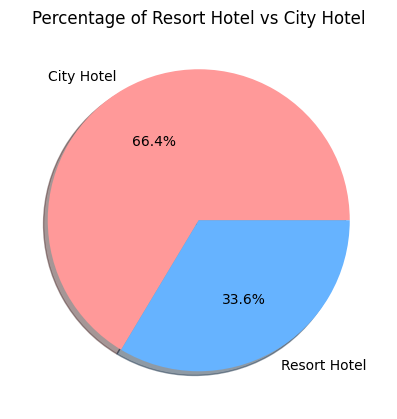

In [18]:
#Plot for Bookings of different hotel type
plt.figure(figsize=(7,5), dpi=100)
proportion = df1['hotel'].value_counts()
labels = ['City Hotel', 'Resort Hotel']
plt.title('Percentage of Resort Hotel vs City Hotel')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%',colors = ['#ff9999','#66b3ff'])
plt.show()


There were more bookings in the City Hotel than in the Resort Hotel.

Total percentage of  bookings canceled in City Hotel is  41.79
Total percentage of  bookings canceled in Resort Hotel is  27.77


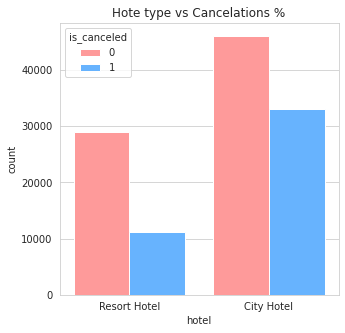

In [101]:
#Count plot for canceled and non-canceled bookings in both the hotels
plt.figure(figsize = (5,5))
plt.title('Hote type vs Cancelations %')
sns.countplot(df1['hotel'], hue = df1['is_canceled'],palette= ['#ff9999','#66b3ff'],saturation=.99)
print('Total percentage of  bookings canceled in City Hotel is ',round(100*df1[df1['is_canceled']==1][df1['hotel']=='City Hotel'].shape[0]/df1[df1['hotel']=='City Hotel'].shape[0],2))
print('Total percentage of  bookings canceled in Resort Hotel is ',round(100*df1[df1['is_canceled']==1][df1['hotel']=='Resort Hotel'].shape[0]/df1[df1['hotel']=='Resort Hotel'].shape[0],2))

More cancellations were for the  city hotels.

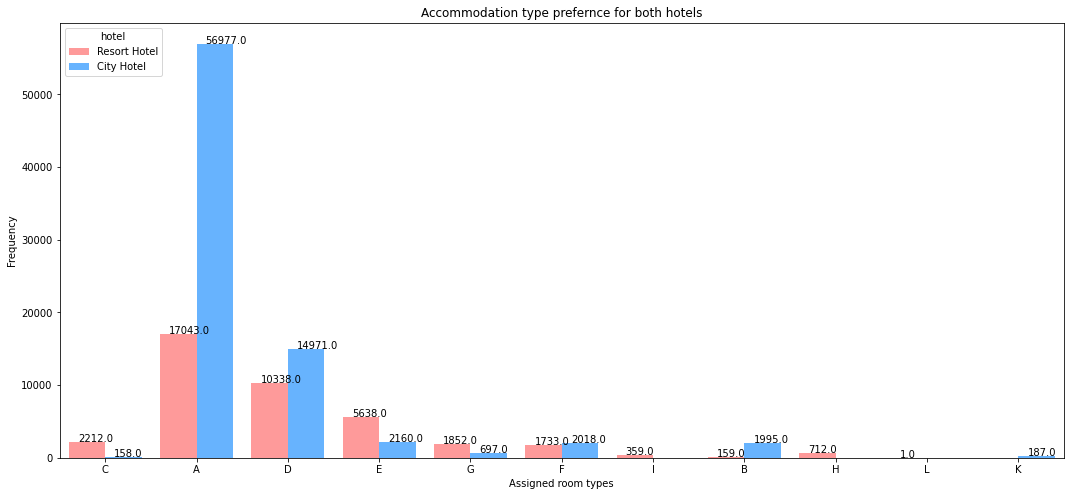

In [20]:
plt.figure(figsize=(18,8))
ax = sns.countplot(df1["assigned_room_type"],hue = df1['hotel'], data=df1,palette= ['#ff9999','#66b3ff'],saturation=.99)
plt.title('Accommodation type prefernce for both hotels')
plt.xlabel('Assigned room types')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

For both the hotel type, "A" room type was most prefered, followed by "D".

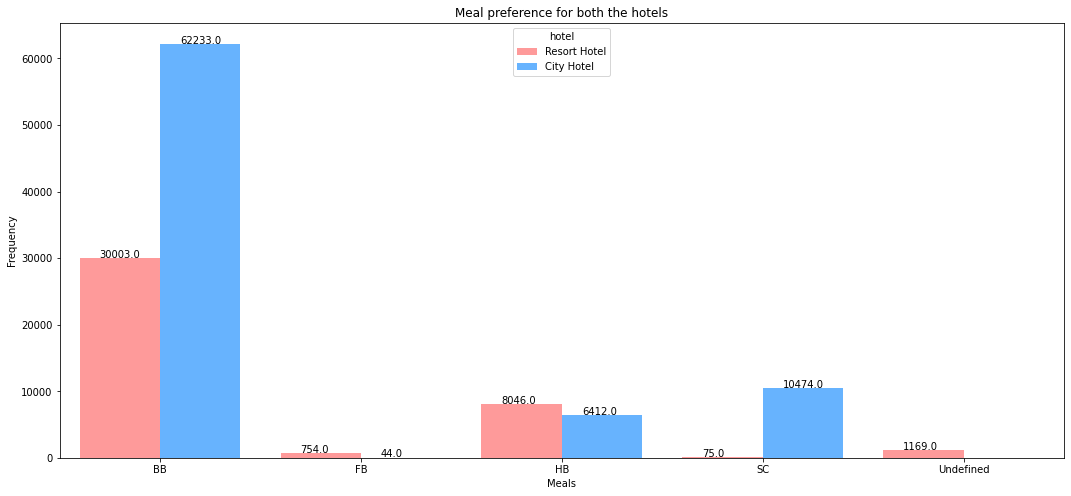

In [21]:
plt.figure(figsize=(18,8))
ax = sns.countplot(df1["meal"],hue = df1['hotel'], data=df1,palette= ['#ff9999','#66b3ff'],saturation=.99)
plt.title('Meal preference for both the hotels')
plt.xlabel('Meals')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Types of meal in hotels: 
BB - (Bed and Breakfast) 
HB- (Half Board) 
FB- (Full Board) 
SC- (Self Catering)

For both the hotel types, BB was the most prefered meal.

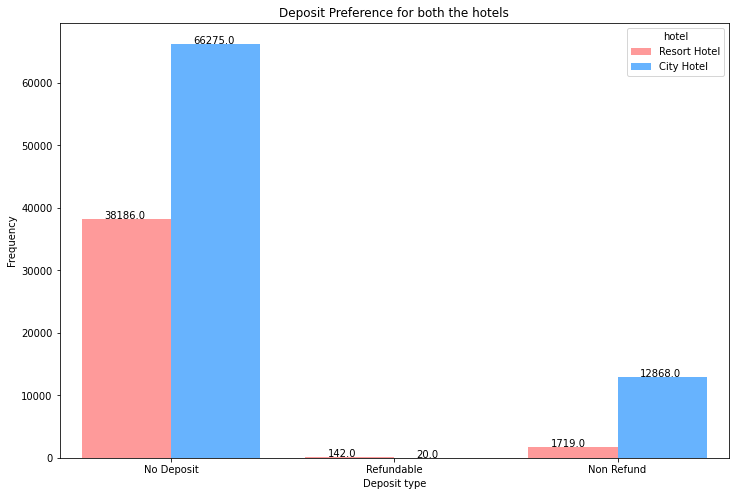

In [22]:
#Plot showing deposit type based on hotel type
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['deposit_type'],hue = df1['hotel'], data=df1, palette= ['#ff9999','#66b3ff'],saturation=.99)
plt.title('Deposit Preference for both the hotels')
plt.xlabel('Deposit type')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Non Refundable bookings are really less in Resort Hotel as compared to City Hotel.

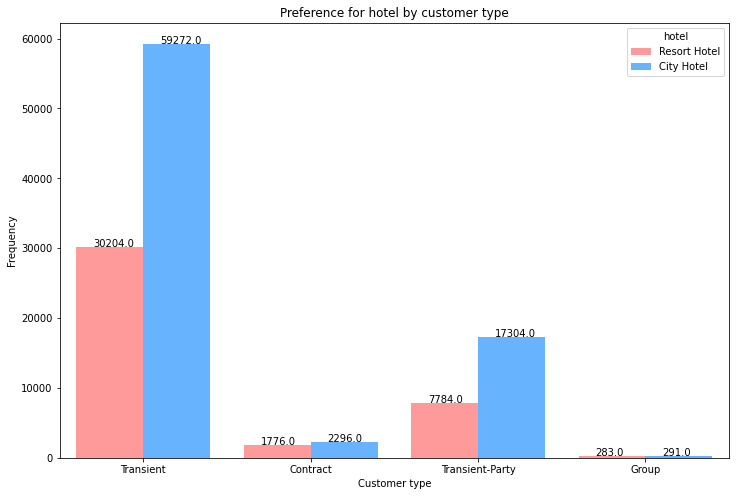

In [23]:
#Plot showing customer type based on hotel type
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['customer_type'],hue = df1['hotel'], data=df1,  palette= ['#ff9999','#66b3ff'],saturation=.99)
plt.title('Preference for hotel by customer type')
plt.xlabel('Customer type')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

All of the customer types prefer City hotels over Resort Hotels.


In [24]:
#Creating a new column to know the total no. of people
df1['people'] = df1['adults'] + df1['children'] +df1['babies']
dfp = df1[df1['people']<6]

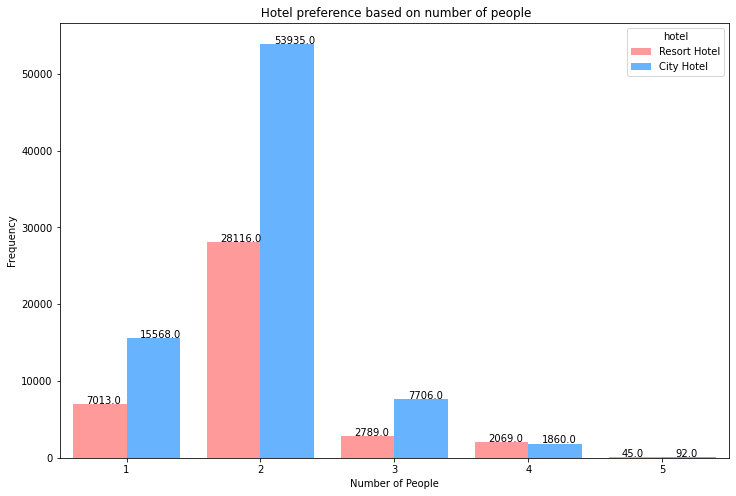

In [25]:
#Plot showing hotel preference of people based on hotel type
plt.figure(figsize=(12,8))
ax = sns.countplot(dfp["people"],hue = dfp['hotel'], data=dfp,palette= ['#ff9999','#66b3ff'],saturation=.99)
plt.title(' Hotel preference based on number of people')
plt.xlabel('Number of People')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Based on the number of people who come as a family for the stay, all prefer City Hotel over Resort Hotel except when the number of people is 4.

# Cancellation Analysis

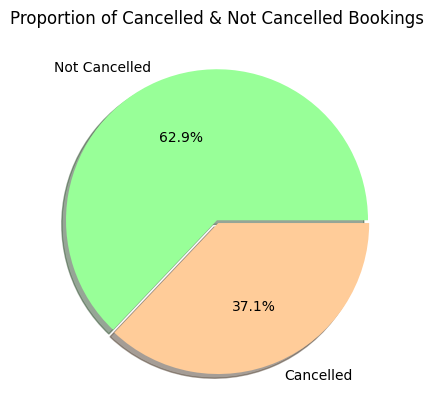

In [26]:
#Plot based on cancelations
plt.figure(figsize=(7,5), dpi=100)
proportion = df1['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings')
plt.pie(proportion, explode=(0,0.02),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#98ff98','#ffcc99'])
plt.show()


Bookings got cancelled 37% of the time. While guests did checked-in (did not cancel the booking ) almost 63% of the time.


Cancellation by cutomer type

In [27]:
ab=pd.DataFrame()
ab['values']=round(100*df1.groupby(['customer_type','is_canceled'])['is_canceled'].count()/df1.groupby('customer_type')['is_canceled'].count(),2)
ab.reset_index(inplace=True)

Text(0, 0.5, 'Frequency')

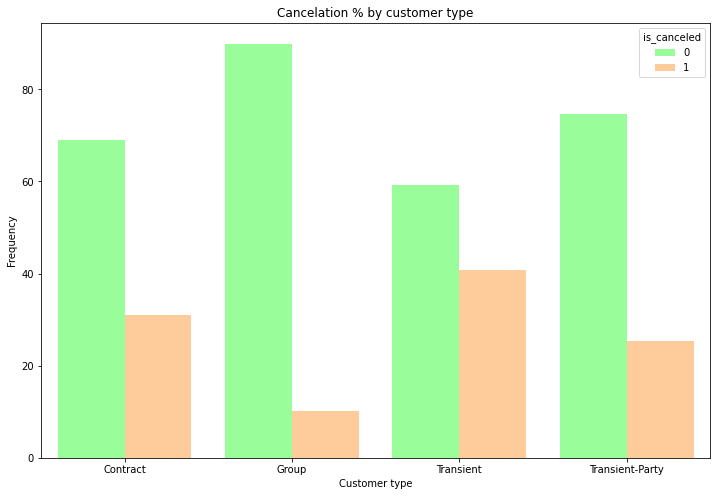

In [28]:
#Plot based on cancelations by customer type
plt.figure(figsize=(12,8))
ax = sns.barplot(x=ab['customer_type'],y=ab['values'],hue = ab['is_canceled'], data=ab,palette= ['#98ff98','#ffcc99'] ,saturation=.99)
plt.title('Cancelation % by customer type')
plt.xlabel('Customer type')
plt.ylabel('Frequency')


Transient customer types have the highest cancellation percentage. 

**Cancelation ratio by month**

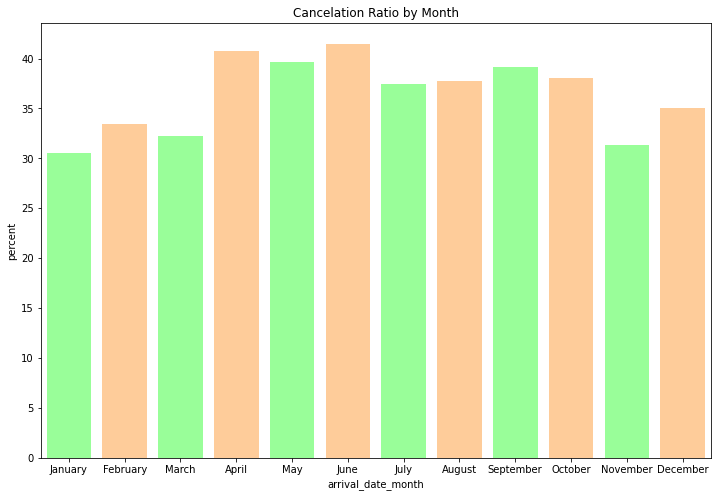

In [29]:
#Plot based on cancelations by month
cancelationratio=pd.DataFrame()
cancelationratio['cases']=df1.groupby('arrival_date_month')['is_canceled'].sum()
cancelationratio['count']=df1.groupby('arrival_date_month')['arrival_date_month'].count()
cancelationratio['percent']=cancelationratio['cases']*100/cancelationratio['count']
plt.figure(figsize=(12,8))

sns.barplot(cancelationratio.index,cancelationratio['percent'],order= ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],palette= ['#98ff98','#ffcc99'] ,saturation=.99)
plt.title("Cancelation Ratio by Month")
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
  


The Cancellation ratio is higher for the month of June followed by April and September and it is lowest for the month of January.

 **Booking percentage for each year**

In [30]:
#Booking percentage by year
year=(df1.groupby('arrival_date_year')['is_canceled'].value_counts().rename('percent').reset_index())
outer = year.groupby('arrival_date_year').sum()
inner = year.groupby(['arrival_date_year', 'is_canceled']).sum()
inner_labels = inner.index.get_level_values(1)
dd=['63%','37%','64%','36%','61%','39%']
outer.values.flatten()
labels=[2015,2016,2017]

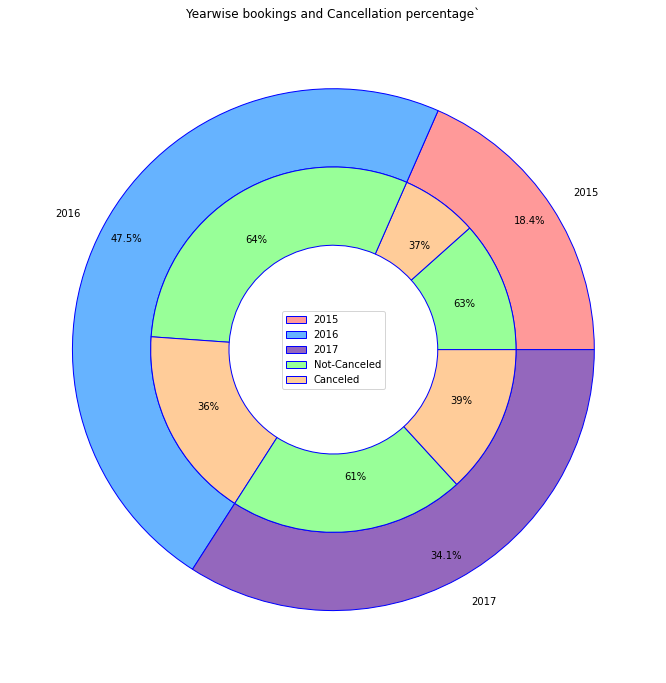

In [31]:
#Nested piechart of Bookings by year
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

cmap = plt.get_cmap("tab20")
outer_colors = ['#ff9999','#66b3ff',cmap(8)]
inner_colors = ['#98ff98','#ffcc99']

labels=['21967','56623',' 40620'] 
subgroup_names_legs=['2015', '2016', '2017', 
'Not-Canceled', 'Canceled']

ax.pie(outer.values.sum(axis=1), center=(0,0),radius=1 ,autopct = '%.1f%%',pctdistance=0.9,colors=outer_colors, labels=[2015,2016,2017],wedgeprops=dict(width=size, edgecolor='b'));

ax.pie(inner.values.flatten(), radius=1-size ,colors=inner_colors,labels=dd,pctdistance=0.7,labeldistance=0.7, wedgeprops=dict(width=size, edgecolor='b'))
plt.legend(subgroup_names_legs,loc='center')
ax.set(aspect="equal", title='Yearwise bookings and Cancellation percentage`') 
plt.show()

Most of the data we have is for the year 2016 and the cancellation rate is ranging between 36%-39%.


In [32]:
c = df1.groupby(['arrival_date_year','arrival_date_month'])['arrival_date_month'].count()
dF = pd.DataFrame(c)
dF.rename(columns = {'arrival_date_month':'month_count'},inplace = True)
dF.reset_index(inplace=True)

# **Busiest month of the year?**

Monthly Bookings per year

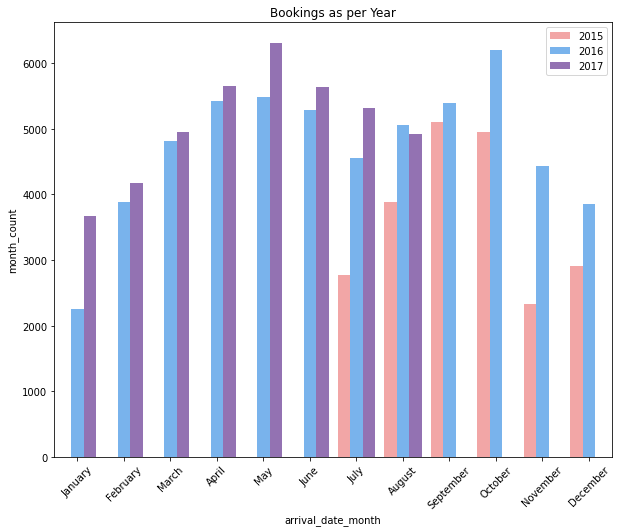

In [33]:
#Booking percentage by year and month
plt.figure(figsize = (10,8))
sns.barplot(dF['arrival_date_month'],dF['month_count'],order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],hue=dF['arrival_date_year'],palette= ['#ff9999','#66b3ff',cmap(8)])
plt.legend(loc='upper right')
plt.title('Bookings as per Year')
plt.xticks(rotation = 45);




*  for the year 2015, the busiest month for the year was September.   
*  for the year 2016, the busiest month for the year was October. 
*  for the year 2017, the busiest month for the year was May. 



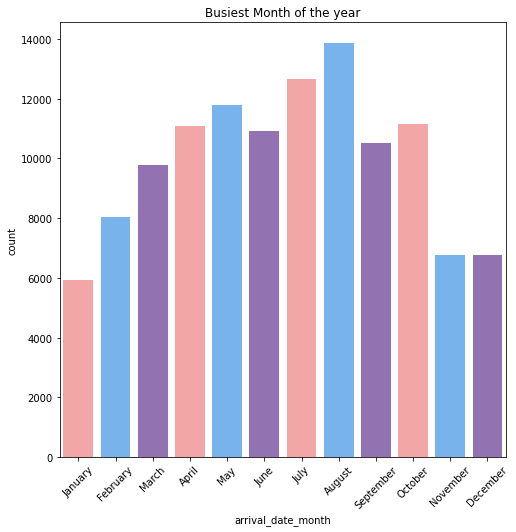

In [34]:
plt.figure(figsize = (8,8))
sns.countplot(df1['arrival_date_month'],order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],palette= ['#ff9999','#66b3ff',cmap(8)]);
plt.xticks(rotation = 45)
plt.title('Busiest Month of the year');


On an overall basis, the busiest month of the year is August
and December is the most non-busiest month.




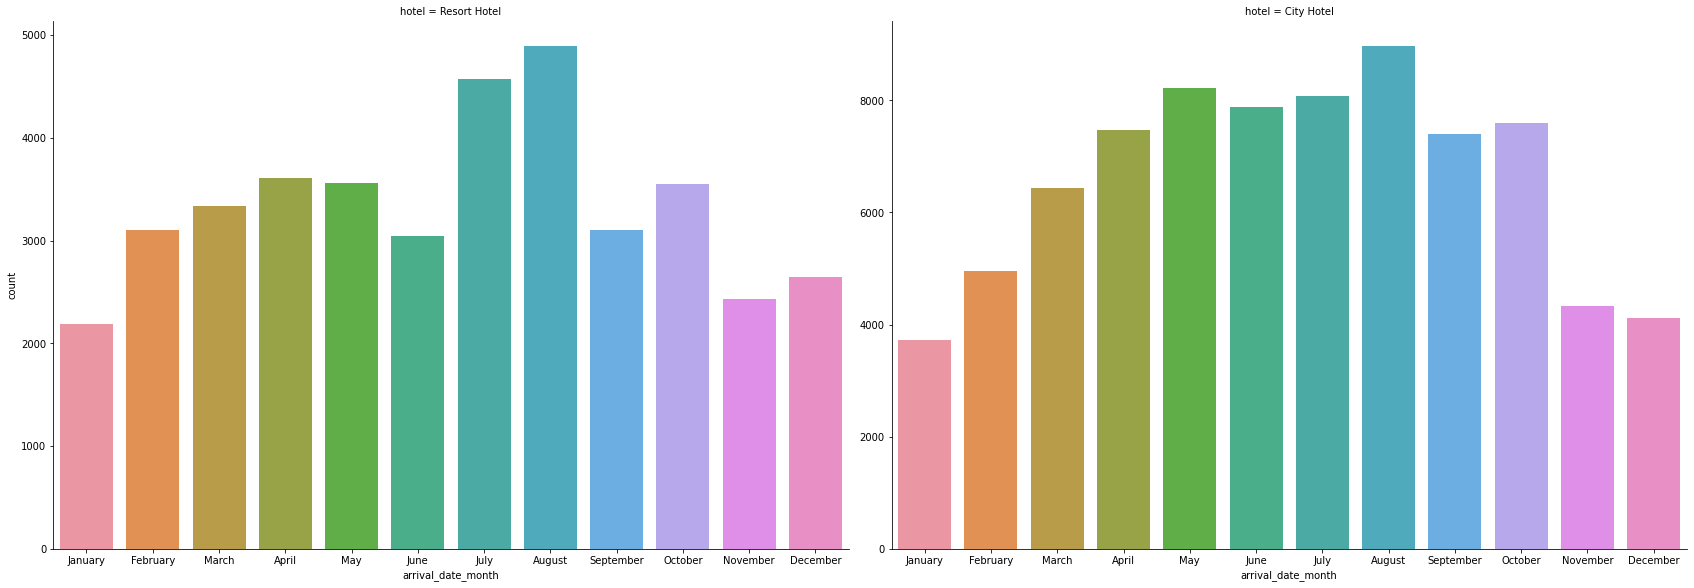

In [35]:
sns.catplot(data=df1,x='arrival_date_month',col='hotel',kind='count',order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],height=8.27,aspect=10/7,sharey=False)
plt.tight_layout();

:
 
The busiest month for both the Hotels was August and in January there were the least bookings.
For both, the hotel's booking pattern was the same for all the months except for June and March.

In [36]:
dic={'January':'01','February': '02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}

In [37]:
def month_num(val):
  return str(val[0])+ '-' + dic[val[1]]
df1['year_month'] = df1[df1.columns[3:5]].apply(month_num,axis =1)

Lead Time based on Hotel

The average lead time for Resort Hotel non-cancelled bookings is 86.36
The average lead time for Resort Hotel cancelled bookings is 118.76
The average lead time for City Hotel non-cancelled bookings is 101.58
The average lead time for City Hotel cancelled bookings is  112.2


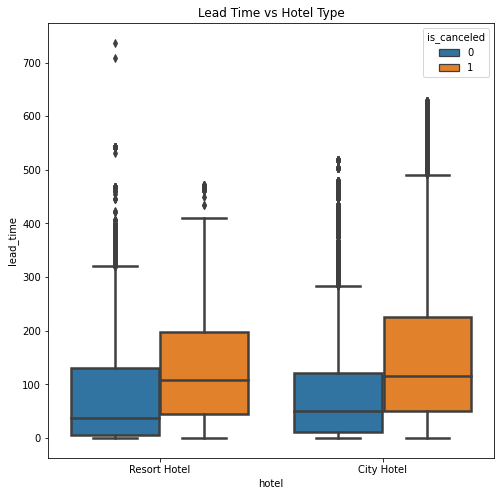

In [38]:
plt.figure(figsize = (8,8))
plt.title('Lead Time vs Hotel Type')
sns.boxplot(x='hotel',y='lead_time',data=df1,linewidth=2.5,hue="is_canceled")
print('The average lead time for Resort Hotel non-cancelled bookings is',round( df1[(df1['hotel']=='Resort Hotel')|(df1['is_canceled']==0)]['lead_time'].mean(),2))
print('The average lead time for Resort Hotel cancelled bookings is', round( df1[(df1['hotel']=='Resort Hotel')|(df1['is_canceled']==1)]['lead_time'].mean(),2))
print('The average lead time for City Hotel non-cancelled bookings is', round(df1[(df1['hotel']=='City Hotel')|(df1['is_canceled']==0)]['lead_time'].mean(),2))
print('The average lead time for City Hotel cancelled bookings is ',round(df1[(df1['hotel']=='City Hotel')|(df1['is_canceled']==1)]['lead_time'].mean(),2))

The difference between cancelled and non-cancelled bookings of Resort Hotel is really huge.Improvement in the lead time of bookings can lead to fewer cancellations for Resort Hotel.

In [39]:
df1.groupby(df1['hotel'])['is_repeated_guest'].mean()

hotel
City Hotel      0.024974
Resort Hotel    0.044398
Name: is_repeated_guest, dtype: float64

The average lead time for cancelled bookings is 144.89
The average lead time for not cancelled bookings is  80.08


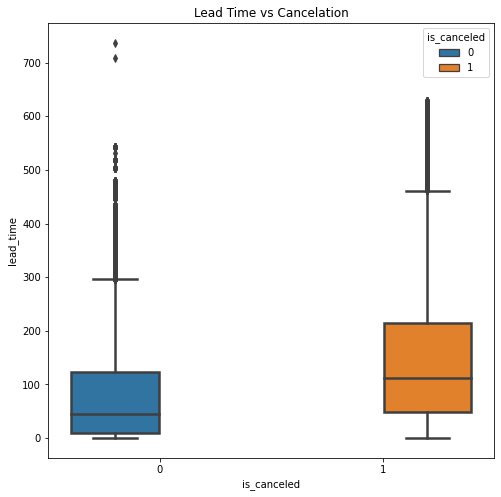

In [40]:
plt.figure(figsize = (8,8))
plt.title('Lead Time vs Cancelation')
sns.boxplot(x='is_canceled',y='lead_time',data=df1,linewidth=2.5,hue="is_canceled")
print('The average lead time for cancelled bookings is',round( df1[df1['is_canceled']==1]['lead_time'].mean(),2))
print('The average lead time for not cancelled bookings is ',round(df1[df1['is_canceled']==0]['lead_time'].mean(),2))

Bookings which got cancelled had higher lead time.

## **Correlation**

In [41]:
df2= df1.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

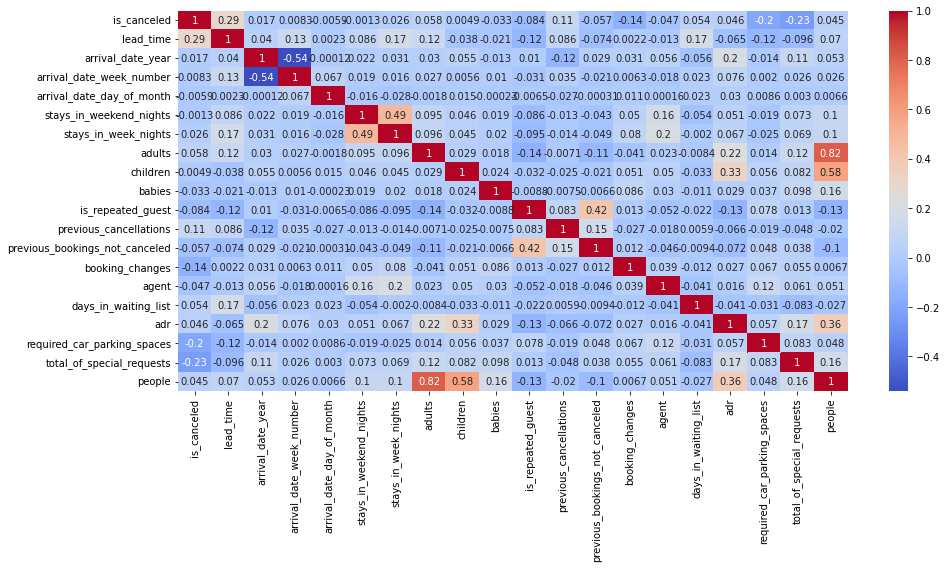

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(df2,annot = True, cmap = 'coolwarm')
plt.xticks(color = 'black', rotation = 90,size= 10)




1.   stays_in_week_nights and stays_in_weekend_nights are positively correlated.
2.   is_repeated_guest and previous_bookings_not_canceled are positively correlated.May be repeated guests are not more likely to cancel their bookings.

3.  total_of_special_requests and is_canceled are negatively correlated implying higher the number of special request lower the chances of cancellations.
4. Adults and Children are positively correlated to ADR that means more the people more will be the ADR.
5. arrival_date_week_number and arrival_date_year are negatively correlated.


## **Analysis based on Country**

In [43]:
lst=[]
for name,group in df1.groupby(['country','is_canceled']):
    lst.append([name[0],name[1],group.shape[0]])
state_count_df = pd.DataFrame(lst)
state_count_df.columns=['Country','is_canceled','Count']
state_count_df.nlargest(10,['Count'])

,Country,is_canceled,Count
223,PRT,1,27563
222,PRT,0,21398
98,GBR,0,9668
92,FRA,0,8468
83,ESP,0,6383
69,DEU,0,6067
126,IRL,0,2542
99,GBR,1,2452
135,ITA,0,2428
84,ESP,1,2177


In [44]:
#Plot showing countrywise record of bookings
import plotly.express as px
import plotly.graph_objects as pg
country_count = df1['country'].value_counts().to_frame()
country_count.columns = ['Count']
country_count['percent']=country_count['Count']*100/country_count.Count.sum()
fig_country = px.choropleth(country_count, color='percent',
                    locations=country_count.index,
                    hover_name=country_count.index,
                    color_continuous_scale=px.colors.diverging.Spectral_r)
fig_country.update_traces(marker=dict(line=dict(color='#7201a8', width=1)))
fig_country.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22),)
fig_country.show()

Most guests come from Portugal(PTR), Great Britain(GBR), France(FRA), Spain(ESP), Germany(DEU), Italy(ITA), Ireland(IRL), Belgium(BEL).

In [45]:
#Plot showing cancellations countrywise
import plotly.express as px

#long_df = px.data.df_state_count()

fig = px.bar(state_count_df.nlargest(20,['Count']), x="Country", y="Count", color="is_canceled", title="Number of Cancellations by Country").update_xaxes(categoryorder ='total ascending')
fig.show()

The cancellation rate in  Portugal is around 60% and in other countries, it's very minimal.

In [46]:

lst1=[]
for name,group in df1.groupby(['country','hotel']):
    lst1.append([name[0],name[1],group.shape[0]])
state_hotel_df = pd.DataFrame(lst1)
state_hotel_df.columns=['Country','hotel','Count']
state_hotel_df.nlargest(10,['Count'])

,Country,hotel,Count
220,PRT,City Hotel,30877
221,PRT,Resort Hotel,18084
94,FRA,City Hotel,8791
99,GBR,Resort Hotel,6813
72,DEU,City Hotel,6082
98,GBR,City Hotel,5307
86,ESP,City Hotel,4604
87,ESP,Resort Hotel,3956
134,ITA,City Hotel,3302
126,IRL,Resort Hotel,2166


In [47]:
#Plot showing hoteltype bookings countrywise
import plotly.express as px

#long_df = px.data.df_state_count()

fig = px.bar(state_hotel_df.nlargest(20,['Count']), x="Country", y="Count", color="hotel", title="Hotel type by Country").update_xaxes(categoryorder ='total ascending')
fig.show()

All countries prefer the City Hotel over the Resort hotel except Great Britain.


PRT- Portugal
GBR- United Kingdom
FRA- France
ESP- Spain
DEU - Germany
IRL - Ireland
ITA -Itlay
BEL -Belgium
USA - America
BRA -Brazil

NLD-Netherlands

### What effects does Special Requests have on other features? 


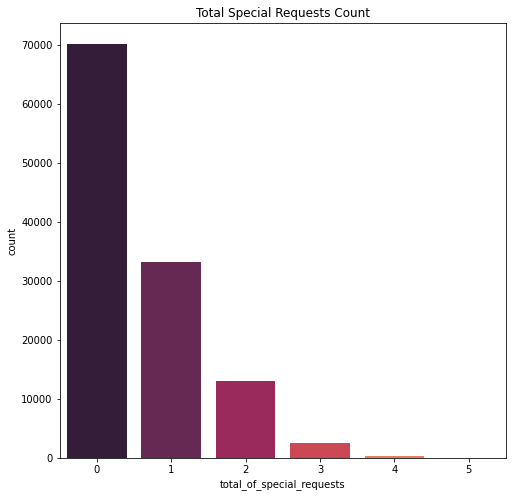

In [48]:
  #Plot showing number of special requests
plt.figure(figsize = (8,8))
plt.title('Total Special Requests Count')
sns.countplot(df1['total_of_special_requests'], palette = 'rocket')

In [49]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'people',
       'year_month'],
      dtype='object')

In [50]:
dfs = df1.groupby('arrival_date_month',as_index= False)['total_of_special_requests'].sum()
dfs.sort_values('total_of_special_requests',ascending = False)

,arrival_date_month,total_of_special_requests
1,August,10210
5,July,8501
8,May,6279
6,June,6164
0,April,5777
10,October,5513
11,September,5264
7,March,4863
3,February,4228
2,December,4152


In [51]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


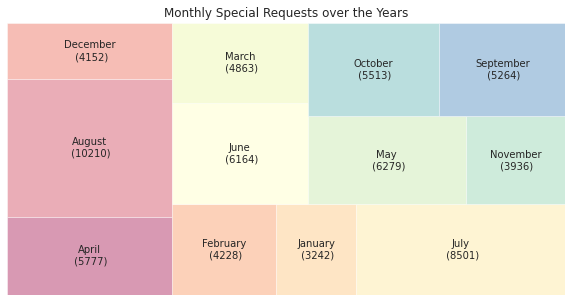

In [52]:
#plotting a treemap to find the monthly number of special requests
import squarify
plt.figure(figsize=(10,5))
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= dfs['total_of_special_requests'].values# proportions of the categories
#label=dfs['arrival_date_month']
labels = dfs.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
#color = ['Red','Yellow','Blue','Green','Purple','Cyan','Indigo','Violet','Pink','Lime','Magenta','Orange']
squarify.plot(sizes=sizes, label=labels, alpha=0.4,color=colors).set(title='Monthly Special Requests over the Years')
plt.axis('off')
plt.show()

From the above treemap, it is visible that the highest number of requests is for the month of August followed by July, May, June, April and so on.

In [53]:
a = df1.groupby('is_canceled')['total_of_special_requests'].sum()
a = pd.DataFrame(a)
a

,total_of_special_requests
is_canceled,
0,53592
1,14537


cancelation rate =  21.33746275448047


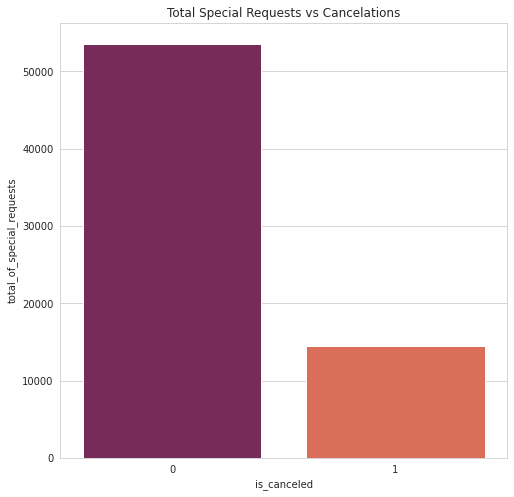

In [54]:
#Plot showing number of cancelations based on special requests
plt.figure(figsize=(8,8))
plt.title('Total Special Requests vs Cancelations')
sns.barplot(a.index,a.total_of_special_requests,palette = 'rocket')
print(f'cancelation rate = ' ,14537/(53592+14537)*100)

###1.The cancel rate is higher with increase in total special request

In [55]:
df2 = df1[(df1['babies']>0) & (df1['babies']<5)]

In [56]:
babies_special_requests =df2.groupby('babies')['total_of_special_requests'].count()
babies_special_requests = pd.DataFrame(babies_special_requests)
babies_special_requests

,total_of_special_requests
babies,
1,900
2,15


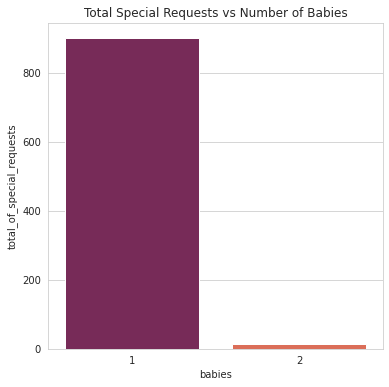

In [57]:
  #Plot showing number of special requests based on number of babies
  plt.figure(figsize=(6,6))
  plt.title('Total Special Requests vs Number of Babies')
  sns.barplot(babies_special_requests.index,babies_special_requests['total_of_special_requests'],palette  = 'rocket')

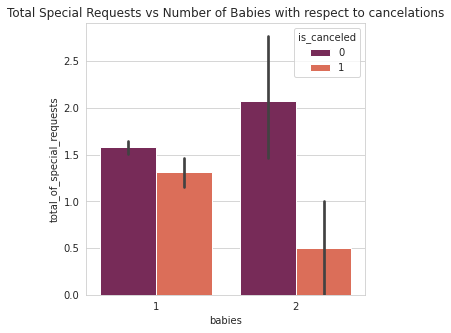

In [58]:
#Plot showing number of special requests based on number of babies with respect to cancelations
plt.figure(figsize = (5,5))
plt.title('Total Special Requests vs Number of Babies with respect to cancelations')
sns.barplot(df2['babies'],df2['total_of_special_requests'], hue = df2['is_canceled'], palette = 'rocket')

Guests with 1 baby make the most number special requests and tend to cancel the bookings.

In [59]:
df1['people'] = df1['adults'] + df1['children'] +df1['babies']
dfp = df1[df1['people']<=5]

In [60]:
people_with_requests = dfp.groupby('people')['total_of_special_requests'].count()
people_with_requests = pd.DataFrame(people_with_requests)
people_with_requests

,total_of_special_requests
people,
1,22581
2,82051
3,10495
4,3929
5,137


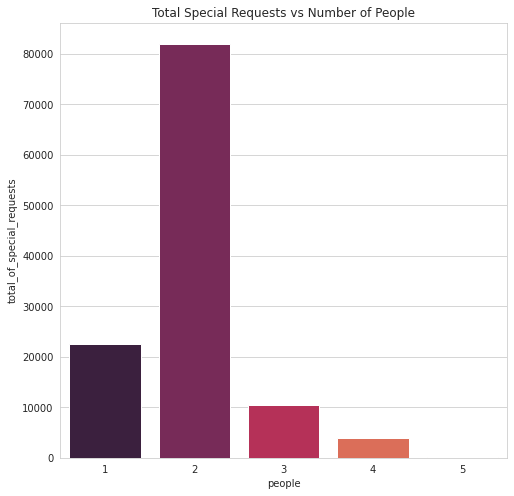

In [61]:
  #Plot showing number of special requests based on number of people
  plt.figure(figsize=(8,8))
  plt.title('Total Special Requests vs Number of People')
  sns.barplot(people_with_requests.index,people_with_requests['total_of_special_requests'],palette  = 'rocket')

Group of 2 people bookings have the highest number of special requests.

In [62]:
df1['total_no_of_days'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

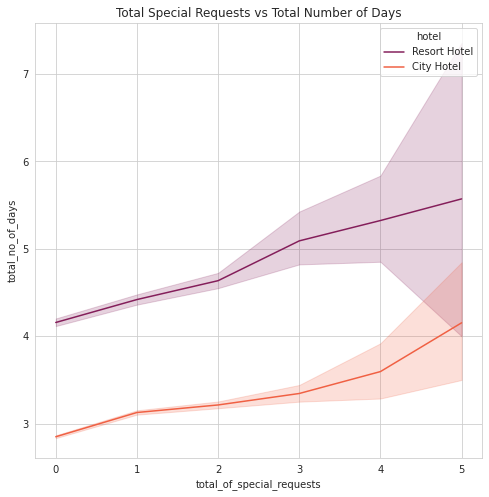

In [63]:
#Plot showing number of special requests vs total number of days
plt.figure(figsize=(8,8))
plt.title('Total Special Requests vs Total Number of Days')
sns.lineplot(df1['total_of_special_requests'],df1['total_no_of_days'], hue = df1['hotel'],palette  = "rocket");

With the increase in special requests there is a increase in no. of stays.

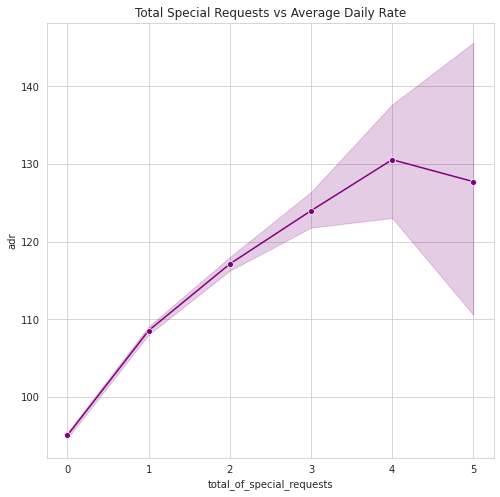

In [64]:
#Plot showing number of special requests vs average daily rate
plt.figure(figsize=(8,8))
plt.title('Total Special Requests vs Average Daily Rate')
sns.lineplot(df1['total_of_special_requests'],df1['adr'],color = 'purple',marker = 'o')

The adr increases with increase in number of special requests.

In [65]:
df5 =df1.groupby(['total_of_special_requests','stays_in_weekend_nights'])['stays_in_weekend_nights'].count()
df6 = df1.groupby(['total_of_special_requests','stays_in_week_nights'])['stays_in_week_nights'].count()
df5 = pd.DataFrame(df5)
df5.rename(columns = {'stays_in_weekend_nights':'weekend_count'},inplace = True)
df5.reset_index(inplace=True)
df6 = pd.DataFrame(df6)
df6.rename(columns = {'stays_in_week_nights':'week_count'},inplace = True)
df6.reset_index(inplace=True)
df5

,total_of_special_requests,stays_in_weekend_nights,weekend_count
0,0,0,32575
1,0,1,17863
2,0,2,17962
3,0,3,627
4,0,4,968
5,0,5,50
6,0,6,88
7,0,7,15
8,0,8,39
9,0,9,5


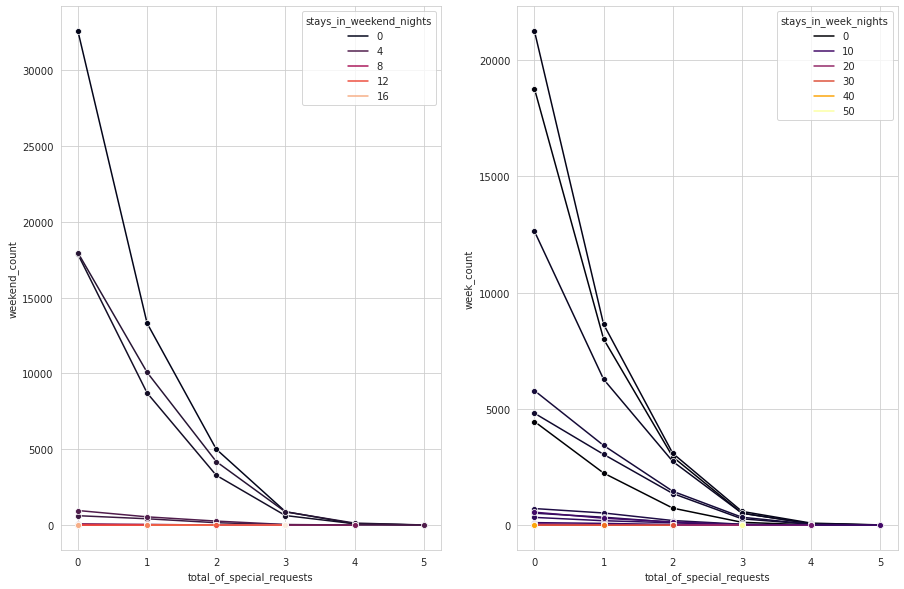

In [66]:
   #Plot showing number of special requests vs weekend ninghts and week nights
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.lineplot(df5['total_of_special_requests'], df5['weekend_count'],hue = df5['stays_in_weekend_nights'],palette = 'rocket', marker = 'o')
plt.subplot(1,2,2)
sns.lineplot(df6['total_of_special_requests'], df6['week_count'], hue = df6['stays_in_week_nights'] ,palette = 'inferno', marker = 'o')
plt.show()

The highest special requests for week and weekend stays are for bookings of 2 nights.
And we also observed that majority of the bookings have no special requests.

#ADR

In [67]:
df2 = df1.copy()

In [68]:
df2 = df2[(df2['total_no_of_days'] <=12) & (df2['total_no_of_days']>0) ]

In [69]:
b = df2.groupby('total_no_of_days')['adr'].mean().reset_index()
b

,total_no_of_days,adr
0,1,94.755891
1,2,97.753298
2,3,105.187782
3,4,105.009271
4,5,113.401533
5,6,120.142319
6,7,103.494297
7,8,114.494009
8,9,114.644452
9,10,108.425930


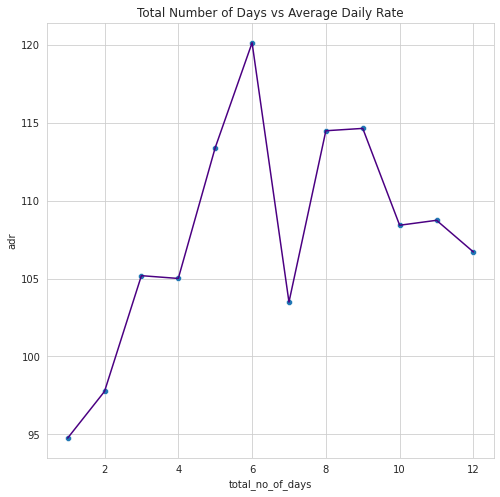

In [70]:
#Plot showing Average Daily Rate vs Total Number of Days
plt.figure(figsize=(8,8))
plt.title('Total Number of Days vs Average Daily Rate')
sns.lineplot(b['total_no_of_days'],b['adr'],color = 'indigo')
sns.scatterplot(b['total_no_of_days'],b['adr'], palette = 'rocket')
plt.show()

Guests staying for 1 day have the lowest adr and for 6 days have the highest adr. 

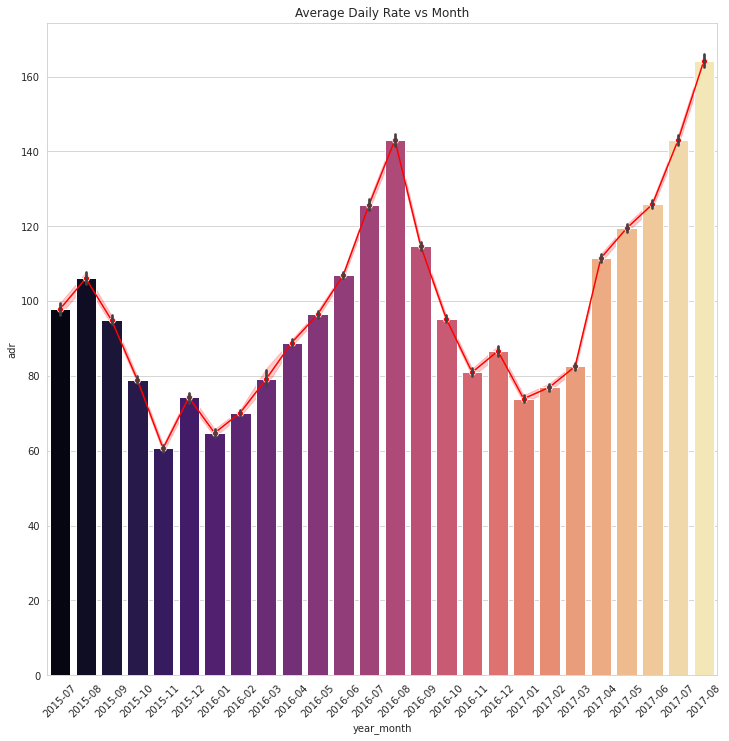

In [71]:
#Plot showing Monthly Average Daily Rate 
plt.figure(figsize=(12,12))
sns.lineplot(df1['year_month'],df1['adr'],color = 'r', marker = 'o')
sns.barplot(df1['year_month'],df1['adr'],palette = 'magma')
plt.title('Average Daily Rate vs Month')
plt.xticks(rotation = 45)
plt.show()

In the month of July, 2016 the average daily rate was the highest. Further it can be said that the adr incresed for all three years for the month of July and dropped for the months from November to January.

In [72]:
dfz = df1[df1['adr']<1000]

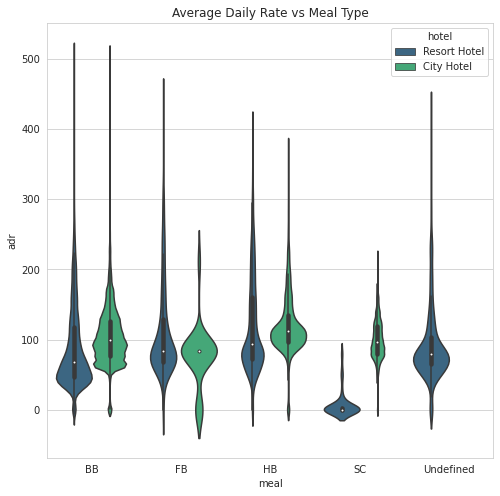

In [73]:
#Plot showing Average Daily Rate based on meal type
plt.figure(figsize=(8,8))
plt.title('Average Daily Rate vs Meal Type')
sns.violinplot(dfz['meal'],dfz['adr'],hue = dfz['hotel'],palette = 'viridis')

The ADR is highest for HB type of meal for both the hotels. Also the BB meal type has high adr for City Hotel compared to Resort Hotel

In [74]:
df1['date']=str(2+df1['arrival_date_day_of_month'])
df1['date']

0         0          3\n1          3\n2          3\n3   ...
1         0          3\n1          3\n2          3\n3   ...
2         0          3\n1          3\n2          3\n3   ...
3         0          3\n1          3\n2          3\n3   ...
4         0          3\n1          3\n2          3\n3   ...
                                ...                        
119385    0          3\n1          3\n2          3\n3   ...
119386    0          3\n1          3\n2          3\n3   ...
119387    0          3\n1          3\n2          3\n3   ...
119388    0          3\n1          3\n2          3\n3   ...
119389    0          3\n1          3\n2          3\n3   ...
Name: date, Length: 119210, dtype: object

In [75]:
df1['people1'] = df1['adults'] + df1['children']
dfz = df1[df1['adr']<1000]
dfz['adr_per_person'] = dfz['adr']/dfz['people1']
dfz = dfz[dfz['people1']<= 5]

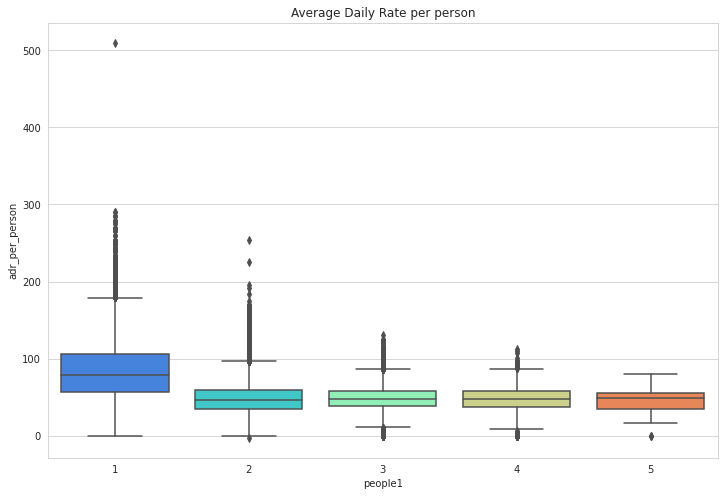

In [76]:
#Plot showing Average Daily Rate per Person
plt.figure(figsize=(12,8))
plt.title('Average Daily Rate per person')
sns.boxplot(dfz['people1'],dfz['adr_per_person'],palette = 'rainbow')
plt.show()

The highest average daily rate per person was for bookings with only one guest.

# market segment

In [77]:
df1['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

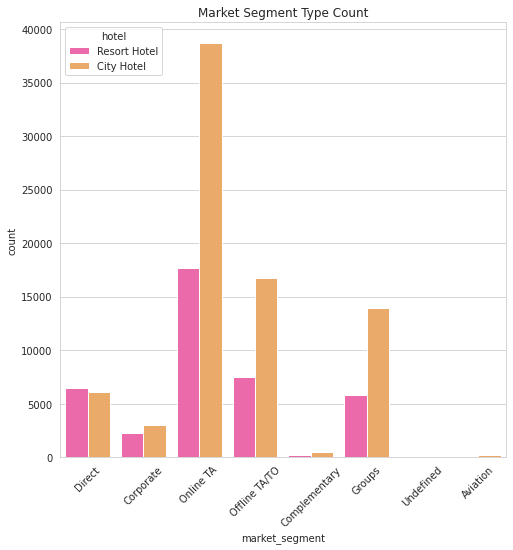

In [78]:
  plt.figure(figsize=(8,8))
  plt.title('Market Segment Type Count')
  sns.countplot(df1['market_segment'],hue = df1['hotel'],palette  = 'spring')
  plt.xticks(rotation = 45)

The most number of booking were via Online TA of the market segment for both hotel types.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

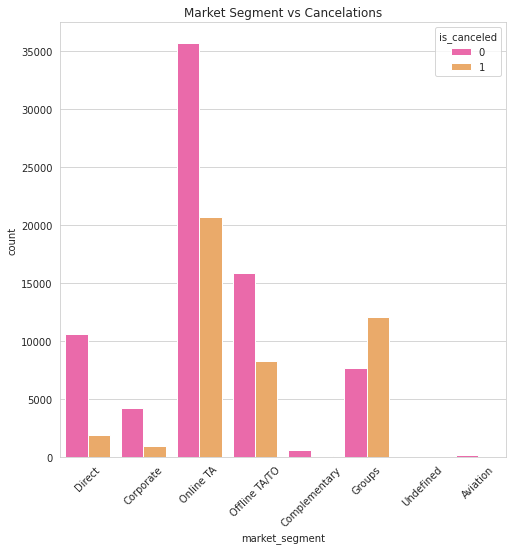

In [79]:
  plt.figure(figsize=(8,8))
  plt.title('Market Segment vs Cancelations')
  sns.countplot(df1['market_segment'],hue = df1['is_canceled'],palette  = 'spring')
  plt.xticks(rotation = 45)

The most number of cancellation were for the Online TA segment

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

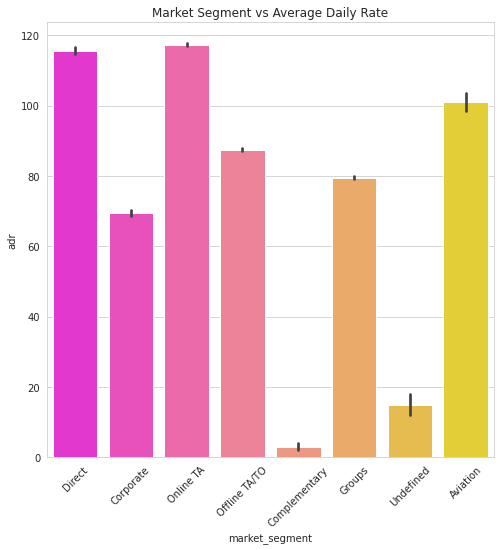

In [80]:
  plt.figure(figsize=(8,8))
  plt.title('Market Segment vs Average Daily Rate')
  sns.barplot(df1['market_segment'],df1['adr'],palette  = 'spring')
  plt.xticks(rotation = 45)

The lowest adr was for bookings via complementary type whereas Direct, Online TA, aviation has the highest average daily rates.

In [81]:
repeated = df1[df1['is_repeated_guest']==1]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

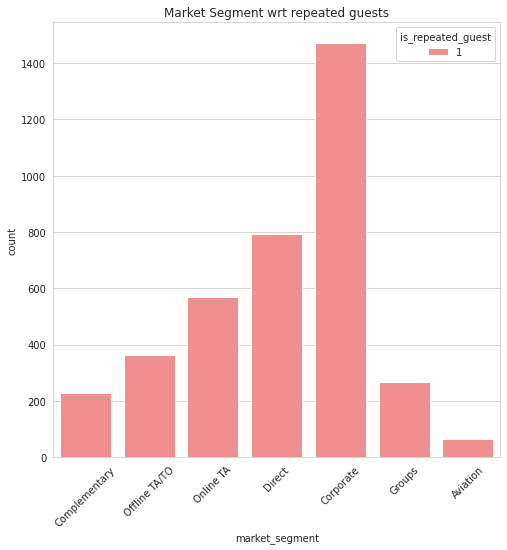

In [82]:
  plt.figure(figsize=(8,8))
  plt.title('Market Segment wrt repeated guests')
  sns.countplot(repeated['market_segment'], hue = repeated['is_repeated_guest'],palette  = 'spring')
  plt.xticks(rotation = 45)

The guests who repeated their bookings chose to book via the Coorporate segment,Direct and Online TA.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

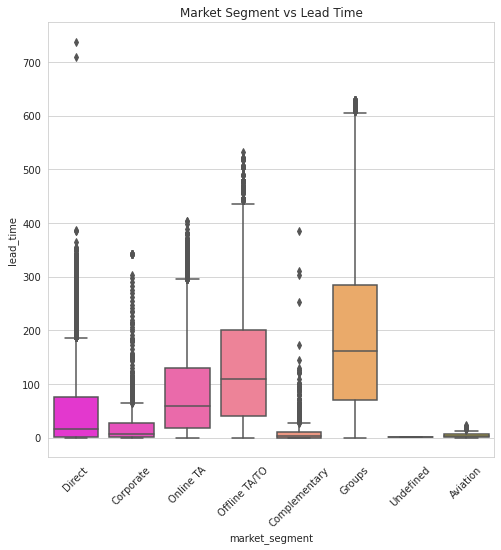

In [83]:
  plt.figure(figsize=(8,8))
  plt.title('Market Segment vs Lead Time')
  sns.boxplot(df1['market_segment'],df1['lead_time'],palette  = 'spring')
  plt.xticks(rotation = 45)

The lead time for the Group segments were the highest.

In [102]:
a1 = df1[df1['market_segment'] == "Online TA"]

In [85]:
a1 = df1.groupby(['arrival_date_year','market_segment'])["market_segment"].count()
a1 = pd.DataFrame(a1)
a1.rename({'market_segment' : 'market_count'},axis=1, inplace = True)
a1.reset_index(inplace = True)
a1

,arrival_date_year,market_segment,market_count
0,2015,Complementary,164
1,2015,Corporate,1167
2,2015,Direct,2310
3,2015,Groups,6092
4,2015,Offline TA/TO,6073
5,2015,Online TA,6159
6,2015,Undefined,2
7,2016,Aviation,127
8,2016,Complementary,357
9,2016,Corporate,2557


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

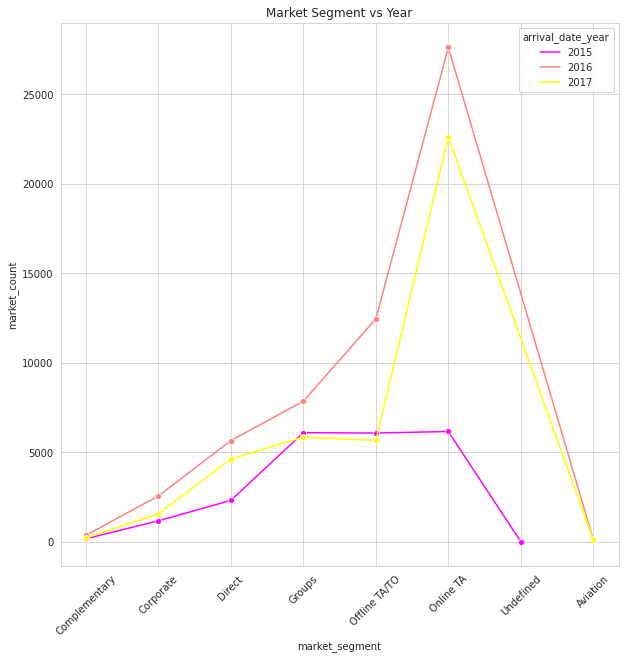

In [86]:
plt.figure(figsize = (10,10))
plt.title('Market Segment vs Year')
sns.lineplot(a1['market_segment'],a1['market_count'],hue = a1['arrival_date_year'], marker = 'o', palette='spring')
plt.xticks(rotation = 45)

We observe that from 2016 there was a rise in bookings via Online TA.

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

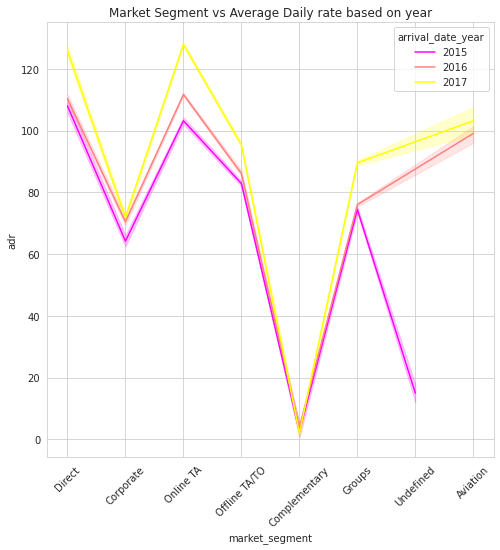

In [87]:
  plt.figure(figsize=(8,8))
  plt.title('Market Segment vs Average Daily rate based on year')
  sns.lineplot(df1['market_segment'],df1['adr'],hue=df1['arrival_date_year'],palette  = 'spring')
  plt.xticks(rotation = 45)

Direct and Online TA has the highest ADR while lowest are for Coorporate segment.

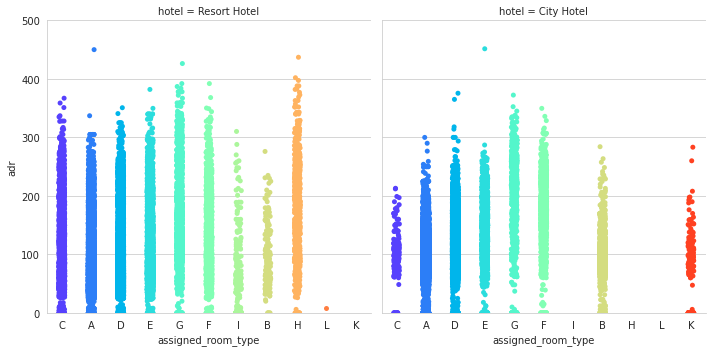

In [88]:
sns.catplot(data=df1,x='assigned_room_type',y='adr',col='hotel',kind='strip',palette  = 'rainbow')
plt.ylim(0, 500)
plt.tight_layout()

#####In case of City Hotel room types K,L,I have the lowest adr whereas for Resort Hotel room types I,H,L have the lowest.


In [89]:
# return highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9,31922
174,240,13922
1,1,7187
14,14,3633
7,7,3532
6,6,3290
183,250,2870
175,241,1721
27,28,1657
8,8,1514


Text(0.5, 1.0, 'Most Bookings Made by the agent')

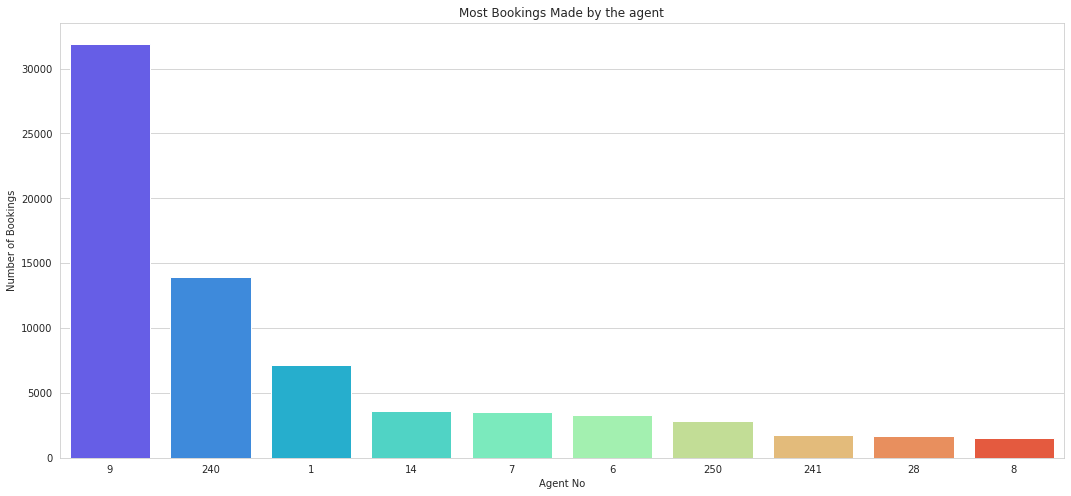

In [90]:

#Visualizaing the graph for top highest bookings by agent number

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],
            y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'],palette='rainbow')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

Agent ID no: 9 made most of the bookings

In [91]:
dfw = df1.groupby('hotel',as_index =False)['days_in_waiting_list'].mean()
dfw

,hotel,days_in_waiting_list
0,City Hotel,3.231484
1,Resort Hotel,0.521837


Text(0.5, 1.0, 'Total Number of days in waiting list vs Hotel Type')

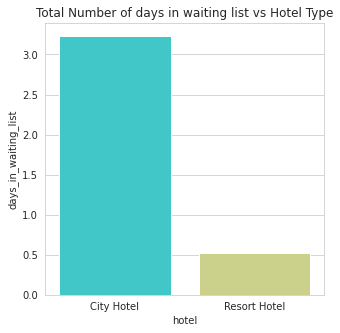

In [92]:
#Plot showing number of waiting list vs hotel type
plt.figure(figsize=(5,5))
#sns.boxplot(x=df1['hotel'],y=df1['days_in_waiting_list'],palette='rainbow')
sns.barplot(x=dfw['hotel'],y=dfw['days_in_waiting_list'],palette='rainbow')
plt.title('Total Number of days in waiting list vs Hotel Type')
#sns.violinplot(df1['hotel'],df1['days_in_waiting_list'],palette = 'viridis')

So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

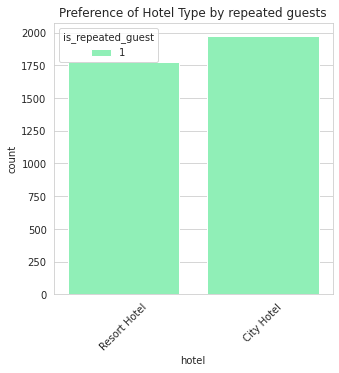

In [93]:
#Plot showing repeated guests based on hotel type
plt.figure(figsize=(5,5))
sns.countplot(repeated['hotel'], hue = repeated['is_repeated_guest'],palette  = 'rainbow')
plt.title('Preference of Hotel Type by repeated guests')
plt.xticks(rotation = 45)

City Hotel has more repeated guest than Resort Hotel.

In [94]:
#groupby
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,82.754477
9,January,Resort Hotel,49.507033
6,February,City Hotel,85.327519
7,February,Resort Hotel,55.189716
15,March,Resort Hotel,57.554652
14,March,City Hotel,92.973339
0,April,City Hotel,111.397415
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.764614


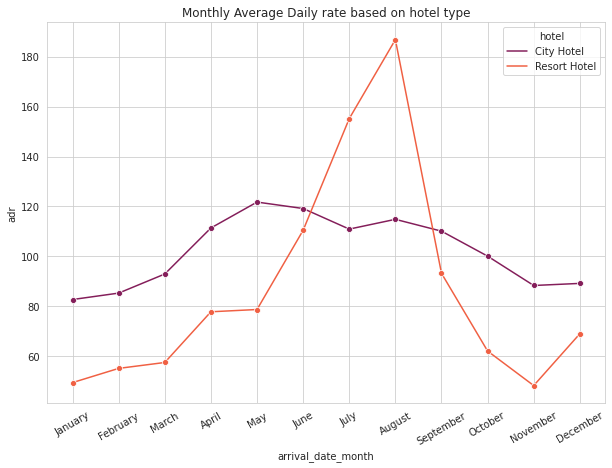

In [95]:
#ADR vs Month
plt.figure(figsize = (10,7))
plt.title('Monthly Average Daily rate based on hotel type')
sns.lineplot(bookings_by_months_df['arrival_date_month'], bookings_by_months_df['adr'],
             hue = bookings_by_months_df['hotel'],palette = 'rocket', marker = 'o')
plt.xticks(rotation=30);

For Resort hotel is ADR is high in the months June, July, August as compared to City Hotels. May be Customers/People wants to spend their Summer vacation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the average daily rate in this month is very low.

In [96]:
df1['totalnights']= df1['stays_in_week_nights']+df1['stays_in_weekend_nights']

In [97]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = df1.groupby(['totalnights', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay.iloc[:21800,:]

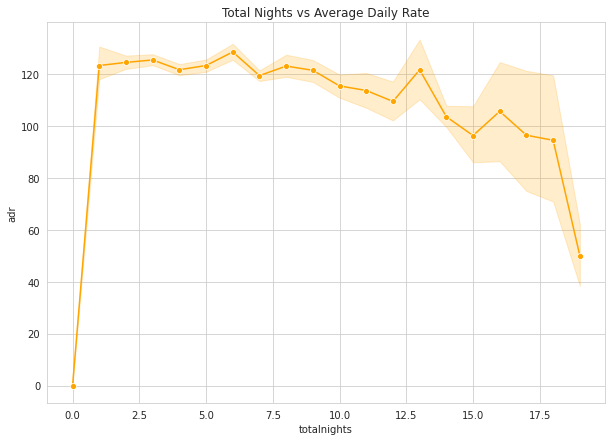

In [98]:
#ADR vs Total Nights
plt.figure(figsize = (10,7))
plt.title('Total Nights vs Average Daily Rate')
sns.lineplot(adr_vs_stay['totalnights'], adr_vs_stay['adr'],color='orange', marker = 'o');

From above plot we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

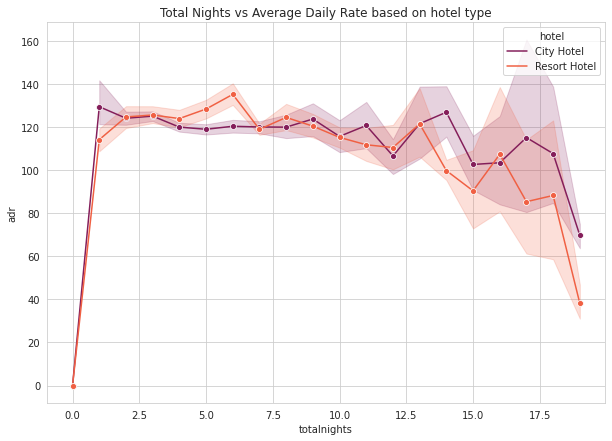

In [99]:
#ADR vs Total Nights for both hotels
plt.figure(figsize = (10,7))
plt.title('Total Nights vs Average Daily Rate based on hotel type')
sns.lineplot(adr_vs_stay['totalnights'], adr_vs_stay['adr'],hue = adr_vs_stay['hotel'],palette = 'rocket', marker = 'o')

For stays longer than 13 days Resort Hotel is cheap.

#**Conclusion**

##Milestones


1.The best time to book a hotel is during the months from October to 
February because during this time period the average daily rate is comparatively lower compared to other months. Additionally, guests should select room types I, L and make the bookings via Corporate, Groups and if possible use complementary channels. Further for best deals the bookings should be made for more than one guests.

2.The optimal length of stay in order to get the best daily rate is for one day or more than seven days and for bookings with more than one guest.

3.The highest amount of special request is received for the month of August followed by the months of July, May, June, April and so on. These request are mainly from guests coming in groups of two(mostly couples) or from those who has a baby with them. Also, the special requests are high for guests with longer stays.


### **Further Inferences**

1.For each year there were more bookings for City Hotel than Resort Hotel.

2.As bookings, Cancellation ratio was higher for City Hotel.

3.For both the hotels “A” room type was most preferred room followed by “D”

4.For both the hotel types, BB (Bed and Breakfast) was the most prefered meal.

5.Non Refundable bookings are really less in Resort Hotel as compared to City Hotel.

6.All of the customer types prefer City hotels over Resort Hotels.

7.The most number of bookings were for 2 people and based on the number of people who come as a family for the stay, all prefer City Hotel over 

8.Resort Hotel except when the number of people is 4.

9.Bookings got canceled 36% of the time. While booking guest did checked-in (did not cancel the booking ) almost 64% of the time.
10.Transient customer types have the highest cancellation percentage.

11.Cancellation ratio is higher for the month of June followed by April and September and it is lowest for the month of January.

12.Most of the data we have is for year 2016 and cancellation rate is ranging between 36%-39% .

13.For 2015-September, 2016-October, 2017- May was the busiest month of the year. On overall basis busiest month of the year is August and 
December is the most non-busiest month.

14.Bookings which got cancelled had higher lead time.

15.Optimal length of the stay for both hotel is 7 days.

16.Most of the bookings were from  Portugal(PTR), Great Britain(GBR), France(FRA), Spain(ESP), Germany(DEU), Italy(ITA), Ireland(IRL), Belgium(BEL) but we can also see a higher cancellation rate of bookings from Portugal around 6% .
